<a href="https://colab.research.google.com/github/armandossrecife/piloto/blob/main/notebooks/valida_fluxo_basico_piloto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informações básicas sobre o repositório

In [1]:
!pwd

/content


In [2]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   25G   84G  23% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  887M  55% /usr/sbin/docker-init
tmpfs           6.4G   40K  6.4G   1% /var/colab
/dev/sda1        41G   26G   15G  64% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [3]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           12Gi       501Mi       9.2Gi       1.0Mi       2.9Gi        11Gi
Swap:            0B          0B          0B


In [4]:
!git clone https://github.com/google/gson.git

Cloning into 'gson'...
remote: Enumerating objects: 31076, done.
remote: Counting objects: 100% (673/673), done.
remote: Compressing objects: 100% (326/326), done.
remote: Total 31076 (delta 320), reused 536 (delta 227), pack-reused 30403
Receiving objects: 100% (31076/31076), 7.52 MiB | 21.99 MiB/s, done.
Resolving deltas: 100% (15690/15690), done.


In [5]:
!cd gson && git rev-list --count HEAD

1844


In [11]:
lista_qtd_commiters_original = !cd gson && git shortlog -sne

In [15]:
lista_commiters = []
for i, each in enumerate(lista_qtd_commiters_original):
  elemento = each.split()
  elemento = (elemento[0], elemento[-1])
  lista_commiters.append(elemento)

In [18]:
# Quantidade total de arquivos .java
!cd gson && git ls-files | grep -c '\.java$'

243


In [19]:
# Quantidade total de arquivos válidos (sem considerar arquivos escondidos)

!cd gson && git ls-files | grep -v '\/\.' | wc -l

291


In [21]:
# Quantidade total de arquivos .java de uma pasta específica

!cd gson/gson/src/main/java && find . -name "*.java" | grep -c ""

82


In [22]:
!cd gson/gson/src/main/java && find . -name "*.java"

./module-info.java
./com/google/gson/ReflectionAccessFilter.java
./com/google/gson/FormattingStyle.java
./com/google/gson/stream/JsonToken.java
./com/google/gson/stream/JsonWriter.java
./com/google/gson/stream/JsonScope.java
./com/google/gson/stream/package-info.java
./com/google/gson/stream/MalformedJsonException.java
./com/google/gson/stream/JsonReader.java
./com/google/gson/InstanceCreator.java
./com/google/gson/TypeAdapterFactory.java
./com/google/gson/JsonParser.java
./com/google/gson/ToNumberPolicy.java
./com/google/gson/JsonDeserializer.java
./com/google/gson/FieldNamingPolicy.java
./com/google/gson/JsonParseException.java
./com/google/gson/JsonStreamParser.java
./com/google/gson/LongSerializationPolicy.java
./com/google/gson/ToNumberStrategy.java
./com/google/gson/TypeAdapter.java
./com/google/gson/internal/$Gson$Types.java
./com/google/gson/internal/$Gson$Preconditions.java
./com/google/gson/internal/ReflectionAccessFilterHelper.java
./com/google/gson/internal/Primitives.java


# Importa dependências

In [23]:
!wget https://raw.githubusercontent.com/armandossrecife/piloto/main/utilidades.py
!wget https://raw.githubusercontent.com/armandossrecife/piloto/main/extracao.py
!wget https://raw.githubusercontent.com/armandossrecife/piloto/main/carrega_dataframes.py

--2023-07-15 18:51:29--  https://raw.githubusercontent.com/armandossrecife/piloto/main/utilidades.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1960 (1.9K) [text/plain]
Saving to: ‘utilidades.py’

utilidades.py       100%[===================>]   1.91K  --.-KB/s    in 0s      

2023-07-15 18:51:29 (20.2 MB/s) - ‘utilidades.py’ saved [1960/1960]

--2023-07-15 18:51:29--  https://raw.githubusercontent.com/armandossrecife/piloto/main/extracao.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4974 (4.9K) [text/plain]
Saving to: ‘

In [24]:
import utilidades

# 1. Carrega dependencias
utilidades.carrega_dependencias()

Teste de análise de repositorios
Faz o dowload das dependências...
Download do requirements.txt concluído com sucesso!
Download do dao.py concluído com sucesso!
Download do utils.py concluído com sucesso!
Dependências instaladas com sucesso!


In [28]:
!rm -rf gson

# Extrai dados de commits e arquivos modificados

In [1]:
import extracao

# extrai informacoes de commits e arquivos modificados em cada commmit
url_repositorio_git = "https://github.com/google/gson.git"
nome_repositorio_git = "gson"
extracao.extrai_informacoes_repositorio(my_repositorio=url_repositorio_git, nome_repositorio=nome_repositorio_git)

Clona repositório https://github.com/google/gson.git
Repositorio clonado com sucesso!
Cria a sessão de banco de dados
Cria as tabelas do banco
Tabelas criadas com sucesso!
Analisa commits e arquivos modificados do repositorio gson. Aguarde...
Sessão de banco de dados fechada!
Quantidade de commits analisados: 1844
Tempo de análise: 0:08:28.298990


# Carrega dados dos commits e arquivos em Dataframes

In [2]:
import carrega_dataframes

banco = carrega_dataframes.DATA_BASE
df_commits_from_db, df_files_from_db, df_files_commits_from_db = carrega_dataframes.load_dataframes(database_name=banco)

In [3]:
df_commits_from_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1844 non-null   int64  
 1   name                  1844 non-null   object 
 2   hash                  1844 non-null   object 
 3   msg                   1844 non-null   object 
 4   author                1844 non-null   object 
 5   committer             1844 non-null   object 
 6   author_date           1844 non-null   object 
 7   author_timezone       1844 non-null   int64  
 8   committer_date        1844 non-null   object 
 9   committer_timezone    1844 non-null   int64  
 10  branches              1844 non-null   object 
 11  in_main_branch        1844 non-null   int64  
 12  merge                 1844 non-null   int64  
 13  modified_files        1844 non-null   object 
 14  parents               1844 non-null   object 
 15  project_name         

In [4]:
df_files_from_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8373 entries, 0 to 8372
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  8373 non-null   int64  
 1   name                8373 non-null   object 
 2   hash                8373 non-null   object 
 3   description         0 non-null      object 
 4   is_java             8373 non-null   int64  
 5   created_date        8373 non-null   object 
 6   old_path            7253 non-null   object 
 7   new_path            7543 non-null   object 
 8   filename            8373 non-null   object 
 9   change_type         8373 non-null   object 
 10  diff                8373 non-null   object 
 11  diff_parsed         8373 non-null   object 
 12  added_lines         8373 non-null   int64  
 13  deleted_lines       8373 non-null   int64  
 14  source_code         8373 non-null   object 
 15  source_code_before  8373 non-null   object 
 16  method

In [5]:
df_files_commits_from_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8373 entries, 0 to 8372
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   file_id                  8373 non-null   int64  
 1   file_hash_commit         8373 non-null   object 
 2   file_description         0 non-null      object 
 3   file_is_java             8373 non-null   int64  
 4   file_created_date        8373 non-null   object 
 5   file_old_path            7253 non-null   object 
 6   file_new_path            7543 non-null   object 
 7   file_filename            8373 non-null   object 
 8   file_change_type         8373 non-null   object 
 9   file_diff                8373 non-null   object 
 10  file_diff_parsed         8373 non-null   object 
 11  file_added_lines         8373 non-null   int64  
 12  file_deleted_lines       8373 non-null   int64  
 13  file_source_code         8373 non-null   object 
 14  file_source_code_before 

## Ajustes e Consultas nos dataframes

In [6]:
# Faz alguns ajustes nos dataframes
df_files_from_db['modified_lines'] = df_files_from_db.added_lines + df_files_from_db.deleted_lines
df_files_commits_from_db['modified_lines'] = df_files_commits_from_db.file_added_lines + df_files_commits_from_db.file_deleted_lines

In [7]:
!ls -liaht

total 253M
1704451 drwxr-xr-x  2 root root 4.0K Jul 15 19:03 __pycache__
5242886 drwxr-xr-x  1 root root 4.0K Jul 15 19:03 .
1704537 -rw-r--r--  1 root root 253M Jul 15 19:03 my_promocity.db
1704005 drwxr-xr-x 12 root root 4.0K Jul 15 18:54 gson
1703995 drwxr-xr-x  2 root root 4.0K Jul 15 18:53 .ipynb_checkpoints
1704455 -rw-r--r--  1 root root  469 Jul 15 18:51 utils.py
1704454 -rw-r--r--  1 root root 6.8K Jul 15 18:51 dao.py
1704453 -rw-r--r--  1 root root   53 Jul 15 18:51 requirements.txt
1704450 -rw-r--r--  1 root root 1.4K Jul 15 18:51 carrega_dataframes.py
1704449 -rw-r--r--  1 root root 4.9K Jul 15 18:51 extracao.py
1704447 -rw-r--r--  1 root root 2.0K Jul 15 18:51 utilidades.py
1703947 drwxr-xr-x  1 root root 4.0K Jul 15 18:31 ..
5242887 drwxr-xr-x  1 root root 4.0K Jul 13 13:33 sample_data
3014663 drwxr-xr-x  4 root root 4.0K Jul 13 13:32 .config


# Faz a análise das métricas e geração dos scatter plots

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Análise das Linhas modificadas (preparação das métricas de AMLOC e CC)

### Funções

In [9]:
# AMLOC de todos os arquivos
# retorna o df_amloc, df_boxplot_amloc e group_files_modified_lines
def get_accumulated_modified_locs(df_files_from_db):
  # Lista arquivos ordenados por nome com suas linhas modificadas
  df_files_from_db[['name','modified_lines']].sort_values(by=['name'], ascending=True)

  # Agrupa o df por nome do arquivo
  df_groupby_name_modified_lines = df_files_from_db[['name','modified_lines']].groupby('name')

  # Soma o total de linhas modificadas de cada arquivo
  group_files_modified_lines = df_groupby_name_modified_lines.sum()

  # Cria um novo df de Linhas de Código Modificadas
  df_locm = group_files_modified_lines.copy()
  df_locm = df_locm.reset_index()

  # Acrescenta uma coluna File
  df_locm['File'] = 'File'
  df_boxplot_em = df_locm[['modified_lines', 'File']]

  df_accumulated_modified_locs = df_locm.copy()
  return df_accumulated_modified_locs, df_boxplot_em, group_files_modified_lines

def gera_boxplot_accumulated_modified_locs(df_accumulated_modified_locs_boxplot):
  # Boxplot do EM (Esforço de Manutenção de Locs Modificadas). Todos os arquivos do repositório
  plt.figure(figsize=(6,4))
  sns.boxplot(x='File', y='modified_lines', data=df_accumulated_modified_locs_boxplot)
  plt.savefig('accumulated_modified_locs_boxplot.png')

# Remove os arquivos que nao foram modificados
# retorna o df_boxplot_amloc
def get_accumulated_modified_locs_boxplot_valid(df_boxplot_em):
  # Remove os arquivos que não foram modificados ao longo do tempo (O linhas modificadas)
  df_boxplot_em = df_boxplot_em.drop(df_boxplot_em[df_boxplot_em.modified_lines == 0].index)
  plt.figure(figsize=(6,4))
  # Constroi o Boxsplot sem os outliers
  sns.boxplot(x='File', y='modified_lines', data=df_boxplot_em,  showfliers=False)
  plt.savefig('accumulated_modified_locs_boxplot_valid.png')
  return df_boxplot_em

# Cria um df_accumulated_modified_java_files contendo apenas arquivos .java
# df_accumulated_modified_java_files
def get_df_accumulated_modified_java_files(df_accumulated_modified_locs):
  # Cria um df sem os arquivos de Teste
  df_locm_no_test = df_accumulated_modified_locs[(df_accumulated_modified_locs["name"].str.contains('Test') == False)]
  # Cria um df contendo apenas os arquivos .java de implementacao
  df_locm_java_impl = df_locm_no_test[df_locm_no_test['name'].str.contains('.java', regex=False)]
  return df_locm_java_impl

# mostra o boxplot accumulated_modified_java_files
# retorna df_boxplot_em_java_impl contendo apenas arquivos .java
def show_boxplot_accumulated_modified_java_files(df_locm_java_impl):
  df_boxplot_em_java_impl = df_locm_java_impl[['modified_lines', 'File']]
  plt.figure(figsize=(6,4))
  sns.boxplot(x='File', y='modified_lines', data=df_boxplot_em_java_impl)
  plt.savefig('accumulated_modified_locs_boxplot_java_files.png')
  return df_boxplot_em_java_impl

# Calcula os quartiles de todos os arquivos referente a AMLOC
def get_quartiles_offiles_modified_lines(group_files_modified_lines, df_boxplot_em):
  list_of_files_modified_lines = group_files_modified_lines.to_dict()
  print(f'{ len(list_of_files_modified_lines) }, {list_of_files_modified_lines}')
  # Mostra os quatis
  em_q1 = np.percentile(df_boxplot_em.modified_lines, [25])
  em_q2 = np.percentile(df_boxplot_em.modified_lines, [50])
  em_q3 = np.percentile(df_boxplot_em.modified_lines, [75])
  em_q4 = np.percentile(df_boxplot_em.modified_lines, [100])
  print(f'Quartis do Total de Linhas Modificadas: Q1: {em_q1}, Q2: {em_q2}, Q3: {em_q3}, Q4: {em_q4}')
  return em_q1, em_q2, em_q3, em_q4

# Seleciona apenas os AMLOC validos (arquivos que foram modificados pelo menos uma vez)
# retorna o df_boxplot_em_java_impl
def get_accumulated_modified_java_files_valid(df_boxplot_em_java_impl):
  # Remove os arquivos que não foram modificados ao longo do tempo (O linhas modificadas)
  df_boxplot_em_java_impl = df_boxplot_em_java_impl.drop(df_boxplot_em_java_impl[df_boxplot_em_java_impl.modified_lines == 0].index)

  plt.figure(figsize=(6,4))
  # Constroi o Boxsplot sem os outliers
  sns.boxplot(x='File', y='modified_lines', data=df_boxplot_em_java_impl,  showfliers=False)
  plt.savefig('accumulated_modified_locs_boxplot_java_files_valid.png')
  return df_boxplot_em_java_impl

# Calcula os quartiles dos AMLOC .java validos
def get_quartiles_offiles_modified_lines_java_files_valid(df_boxplot_em_java_impl):
  # Mostra os quatis
  em_q1_java_impl = np.percentile(df_boxplot_em_java_impl.modified_lines, [25])
  em_q2_java_impl = np.percentile(df_boxplot_em_java_impl.modified_lines, [50])
  em_q3_java_impl = np.percentile(df_boxplot_em_java_impl.modified_lines, [75])
  em_q4_java_impl = np.percentile(df_boxplot_em_java_impl.modified_lines, [100])
  print(f'Quartis do Total de Linhas Modificadas: Q1: {em_q1_java_impl}, Q2: {em_q2_java_impl}, Q3: {em_q3_java_impl}, Q4: {em_q4_java_impl}')
  return em_q1_java_impl, em_q2_java_impl, em_q3_java_impl, em_q4_java_impl

# Cria um df de complexidade ciclomatica de todos os arquivos
# retorna df_cc_temp
def get_complexidade_ciclomatica(df_files_commits_from_db):
  # Mostra as Complexidades Ciclomáticas dos arquivos ordenada crescent pelo tempo
  df_cc = df_files_commits_from_db[['file_filename', 'file_complexity', 'author_date']].sort_values(by=['file_filename', 'author_date'], ascending=True)
  # Remove files that has not cc
  # cc all files
  df_cc_temp = df_cc.copy()
  df_cc_temp = df_cc_temp[df_cc_temp.file_complexity.notnull()]
  return df_cc_temp

##### Todos os arquivos #####
# gera um boxplot da complexidade ciclomatica de todos os arquivos
def get_boxplot_complexidade_ciclomatica(df_cc_temp):
  df_cc_temp['File'] = 'File'
  df_boxplot_cc_temp = df_cc_temp[['file_complexity', 'File']]
  plt.figure(figsize=(6,4))
  sns.boxplot(x='File', y='file_complexity', data=df_boxplot_cc_temp)
  plt.savefig('boxplot_complexidade_ciclomatica.png')
  return df_cc_temp, df_boxplot_cc_temp

# Calcula os quartiles das complexidades ciclomaticas
# retorna os quartiles
def get_quartiles_complexidade_ciclomatica(df_boxplot_cc_temp):
  # Mostra os quatis
  em_q1_cc_temp = np.percentile(df_boxplot_cc_temp.file_complexity, [25])
  em_q2_cc_temp = np.percentile(df_boxplot_cc_temp.file_complexity, [50])
  em_q3_cc_temp = np.percentile(df_boxplot_cc_temp.file_complexity, [75])
  em_q4_cc_temp = np.percentile(df_boxplot_cc_temp.file_complexity, [100])

  print(f'Quartis do Total de Linhas Modificadas: Q1: {em_q1_cc_temp}, Q2: {em_q2_cc_temp}, Q3: {em_q3_cc_temp}, Q4: {em_q4_cc_temp}')
  return em_q1_cc_temp, em_q2_cc_temp, em_q3_cc_temp, em_q4_cc_temp

### Apenas os arquivos .java ###
# gera um boxplot de complexidade ciclomatica apenas dos arquivos .java
def get_boxplot_complexidade_ciclomatica_only_java(df_cc_temp):
  # Cria um df sem os arquivos de Teste
  df_cc_temp_no_test = df_cc_temp[(df_cc_temp["file_filename"].str.contains('Test') == False)]
  # Cria um df contendo apenas os arquivos .java de implementacao
  df_cc_temp_java_impl = df_cc_temp_no_test[df_cc_temp_no_test['file_filename'].str.contains('.java', regex=False)]
  df_cc_temp_boxplot_em_java_impl = df_cc_temp_java_impl[['file_complexity', 'File']]

  plt.figure(figsize=(6,4))
  sns.boxplot(x='File', y='file_complexity', data=df_cc_temp_boxplot_em_java_impl)
  plt.savefig('boxplot_complexidade_ciclomatica_only_java.png')
  return df_cc_temp_java_impl, df_cc_temp_boxplot_em_java_impl

# calcula os quatiles das complexidade ciclomaticas apenas dos arquivos .java
# retorna os quartiles
def get_quartiles_complexidade_ciclomatica_java_impl(df_cc_temp_boxplot_em_java_impl):
  em_q1_cc_temp_java_impl = np.percentile(df_cc_temp_boxplot_em_java_impl.file_complexity, [25])
  em_q2_cc_temp_java_impl = np.percentile(df_cc_temp_boxplot_em_java_impl.file_complexity, [50])
  em_q3_cc_temp_java_impl = np.percentile(df_cc_temp_boxplot_em_java_impl.file_complexity, [75])
  em_q4_cc_temp_java_impl = np.percentile(df_cc_temp_boxplot_em_java_impl.file_complexity, [100])
  print(f'Quartis do Total de Linhas Modificadas: Q1: {em_q1_cc_temp_java_impl}, Q2: {em_q2_cc_temp_java_impl}, Q3: {em_q3_cc_temp_java_impl}, Q4: {em_q4_cc_temp_java_impl}')
  return em_q1_cc_temp_java_impl, em_q2_cc_temp_java_impl, em_q3_cc_temp_java_impl, em_q4_cc_temp_java_impl

### Testa as métricas de AMLOC e scatter plots

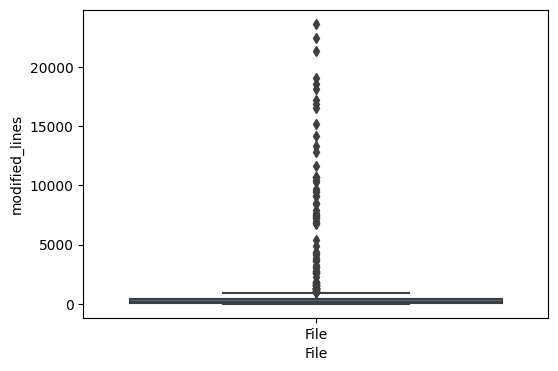

In [10]:
df_accumulated_modified_locs, df_accumulated_modified_locs_boxplot, group_files_modified_lines = get_accumulated_modified_locs(df_files_from_db)
gera_boxplot_accumulated_modified_locs(df_accumulated_modified_locs_boxplot)

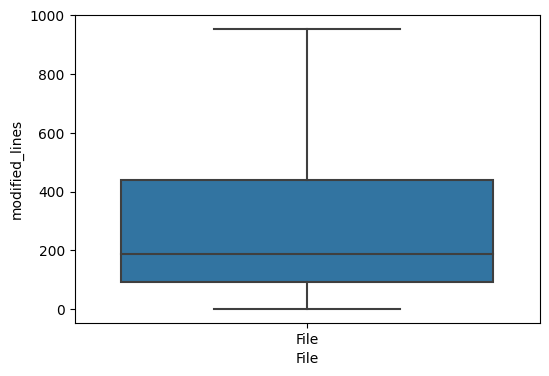

In [11]:
df_accumulated_modified_locs_boxplot_validos = get_accumulated_modified_locs_boxplot_valid(df_accumulated_modified_locs_boxplot)

In [12]:
em_q1, em_q2, em_q3, em_q4 = get_quartiles_offiles_modified_lines(group_files_modified_lines,df_accumulated_modified_locs_boxplot_validos)

1, {'modified_lines': {'$Cache.java': 8, '$Gson$Preconditions.html': 1858, '$Gson$Preconditions.java': 20, '$Gson$Types.html': 2762, '$Gson$Types.java': 376, '$LruCache.java': 8, '$Pair.java': 8, '$Preconditions.java': 4, '$Primitives.java': 14, '$Types.java': 16, '$UnsafeAllocator.java': 12, '.gitattributes': 2, '.gitignore': 29, '.travis.yml': 48, 'Adapt.java': 4, 'AdaptAnnotationOnClassesTest.java': 12, 'AdaptAnnotationOnFieldsTest.java': 12, 'AdaptAnnotationTypeAdapterFactory.java': 12, 'AndroidManifest.xml': 21, 'AnonymousAndLocalClassExclusionStrategy.java': 98, 'ArrayTest.java': 607, 'ArrayTypeAdapter.html': 1008, 'ArrayTypeAdapter.java': 252, 'BagOfPrimitives.java': 161, 'BagOfPrimitivesDeserializationBenchmark.java': 80, 'BaseMapTypeAdapter.java': 100, 'BigDecimalTypeAdapter.html': 936, 'BigDecimalTypeAdapter.java': 120, 'BigIntegerTypeAdapter.html': 936, 'BigIntegerTypeAdapter.java': 120, 'CHANGELOG.md': 734, 'Cache.java': 130, 'CallPath.java': 314, 'CallPathMap.java': 164, '

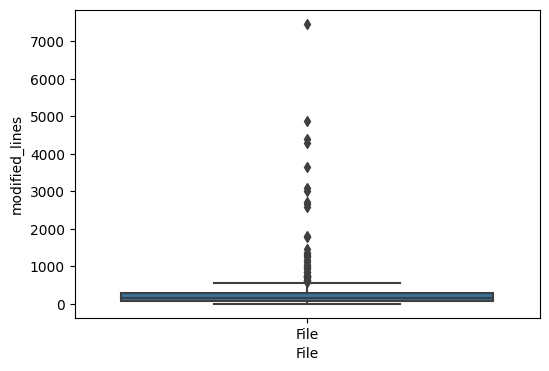

In [13]:
df_locm_java_impl = get_df_accumulated_modified_java_files(df_accumulated_modified_locs)
df_boxplot_em_java_impl = show_boxplot_accumulated_modified_java_files(df_locm_java_impl)

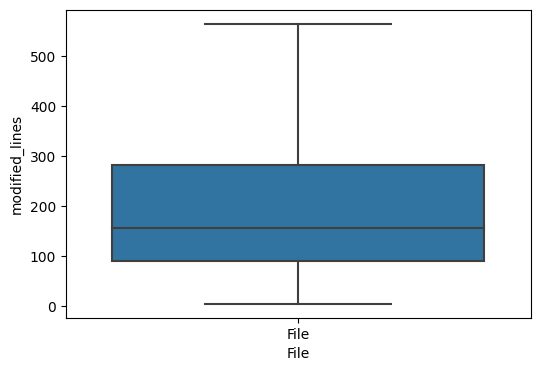

In [14]:
df_boxplot_em_java_impl_valid = get_accumulated_modified_java_files_valid(df_boxplot_em_java_impl)

In [15]:
em_q1_java_impl, em_q2_java_impl, em_q3_java_impl, em_q4_java_impl = get_quartiles_offiles_modified_lines_java_files_valid(df_boxplot_em_java_impl_valid)

Quartis do Total de Linhas Modificadas: Q1: [88.5], Q2: [156.], Q3: [282.], Q4: [7466.]


### Testa as métricas de complexidade ciclomática

In [ ]:
df_complexidade_ciclomatica = get_complexidade_ciclomatica(df_files_commits_from_db)

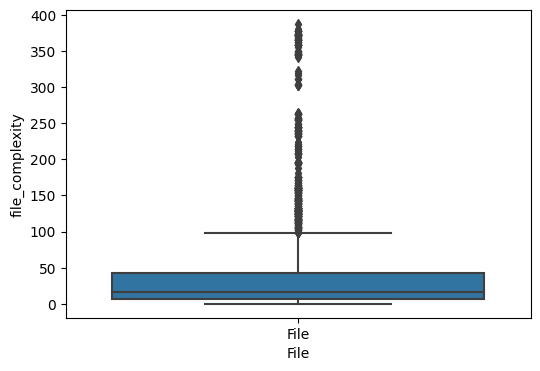

In [17]:
df_cc_temp,df_boxplot_cc_temp = get_boxplot_complexidade_ciclomatica(df_complexidade_ciclomatica)

In [18]:
em_q1_cc_temp,em_q2_cc_temp, em_q3_cc_temp, em_q4_cc_temp = get_quartiles_complexidade_ciclomatica(df_boxplot_cc_temp)

Quartis do Total de Linhas Modificadas: Q1: [6.], Q2: [16.], Q3: [43.], Q4: [388.]


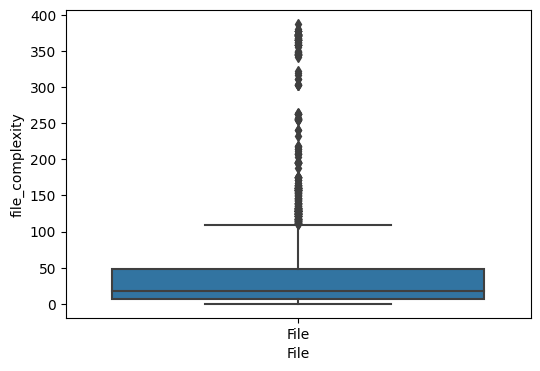

In [20]:
df_cc_temp_java_impl, df_cc_temp_boxplot_em_java_impl = get_boxplot_complexidade_ciclomatica_only_java(df_cc_temp)

In [21]:
em_q1_cc_temp_java_impl, em_q2_cc_temp_java_impl, em_q3_cc_temp_java_impl, em_q4_cc_temp_java_impl= get_quartiles_complexidade_ciclomatica_java_impl(df_cc_temp_boxplot_em_java_impl)

Quartis do Total de Linhas Modificadas: Q1: [7.], Q2: [18.], Q3: [48.], Q4: [388.]


## Cálculo do FOC e geração da relação AMLOCxFOC

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

### Funções

In [38]:
def calcula_frequencia_commits(df_files_from_db):
  # calcula frequência dos arquivos na faixa de commits analisados
  list_of_files_frequency_in_commits = {}

  # Dataframe agrupados por arquivos e seus commits
  df_groupby_name = df_files_from_db[['name', 'hash']].groupby('name')

  print(f'Quantidade de grupos: {df_groupby_name.ngroups}')
  print(f'Grupos: {df_groupby_name.groups}')

  group_files = df_groupby_name.size()
  print(group_files)
  print('')
  list_of_files_frequency_in_commits = group_files.to_dict()
  print(f'{ len(list_of_files_frequency_in_commits) }, {list_of_files_frequency_in_commits}')

  # Cria um df contendo o arquivo e sua frequencia de commits
  df_fc = pd.DataFrame({'name':group_files.index, 'frequency_commits': group_files.values})

  df_boxplot_fc = df_fc
  # Acrescenta a coluna File
  df_boxplot_fc['File'] = 'File'
  return df_fc, df_boxplot_fc

def gera_boxplot_frequencia_commits(df_boxplot_fc):
  plt.figure(figsize=(6,4))
  sns.boxplot(x='File', y='frequency_commits', data=df_boxplot_fc)
  plt.figure(figsize=(6,4))
  plt.savefig('boxplot_frequencia_commmits.png')
  # Constroi o Boxsplot sem os outliers
  sns.boxplot(x='File', y='frequency_commits', data=df_boxplot_fc, showfliers=False)
  plt.savefig('boxplot_frequencia_commmits_no_outliers.png')

def calcula_quartiles_frequencia_commits(df_boxplot_fc):
  fc_q1 = np.percentile(df_boxplot_fc.frequency_commits , [25])
  fc_q2 = np.percentile(df_boxplot_fc.frequency_commits , [50])
  fc_q3 = np.percentile(df_boxplot_fc.frequency_commits , [75])
  fc_q4 = np.percentile(df_boxplot_fc.frequency_commits , [100])

  print(f'Quartis da Frequencia de Commits Q1: {fc_q1}, Q2: {fc_q2}, Q3: {fc_q3}, Q4: {fc_q4}')
  return fc_q1, fc_q2, fc_q3, fc_q4

def gera_boxplot_frequencia_commits_only_java(df_fc):
  # Cria um df sem os arquivos de Teste
  df_fc_no_test = df_fc[(df_fc["name"].str.contains('Test') == False)]

  # Cria um df contendo apenas os arquivos .java de implementacao
  df_fc_java_impl = df_fc_no_test[df_fc_no_test['name'].str.contains('.java', regex=False)]

  df_boxplot_fc_java_impl = df_fc_java_impl[['frequency_commits', 'File']]

  plt.figure(figsize=(6,4))
  sns.boxplot(x='File', y='frequency_commits', data=df_boxplot_fc_java_impl)
  plt.savefig('boxplot_frequencia_commmits_only_java.png')

  plt.figure(figsize=(6,4))
  # Constroi o Boxsplot sem os outliers
  sns.boxplot(x='File', y='frequency_commits', data=df_boxplot_fc_java_impl, showfliers=False)
  plt.savefig('boxplot_frequencia_commmits_only_java_no_outliers.png')

  # Remove as frequencias muito baixas (total de commits < 3)
  df_boxplot_fc_java_impl2 = df_boxplot_fc_java_impl.drop(df_boxplot_fc_java_impl[df_boxplot_fc_java_impl.frequency_commits < 3].index)
  plt.figure(figsize=(6,4))
  # Constroi o Boxsplot sem os outliers
  sns.boxplot(x='File', y='frequency_commits', data=df_boxplot_fc_java_impl2, showfliers=False)
  plt.savefig('boxplot_frequencia_commmits_only_java_no_outliers_less_3.png')
  return df_fc_java_impl, df_boxplot_fc_java_impl, df_boxplot_fc_java_impl2

def calcula_quartiles_frequencia_commmits_java_impl(df_fc_java_impl):
  fc_q1_java_impl = np.percentile(df_fc_java_impl.frequency_commits , [25])
  fc_q2_java_impl = np.percentile(df_fc_java_impl.frequency_commits , [50])
  fc_q3_java_impl = np.percentile(df_fc_java_impl.frequency_commits , [75])
  fc_q4_java_impl = np.percentile(df_fc_java_impl.frequency_commits , [100])
  print(f'Quartis da Frequencia de Commits Q1: {fc_q1_java_impl}, Q2: {fc_q2_java_impl}, Q3: {fc_q3_java_impl}, Q4: {fc_q4_java_impl}')
  return fc_q1_java_impl, fc_q2_java_impl, fc_q3_java_impl, fc_q4_java_impl

def calcula_quartiles_frequencia_commmits_no_outliers(df_boxplot_fc_java_impl):
  fc_q1_java_impl = np.percentile(df_boxplot_fc_java_impl.frequency_commits , [25])
  fc_q2_java_impl = np.percentile(df_boxplot_fc_java_impl.frequency_commits , [50])
  fc_q3_java_impl = np.percentile(df_boxplot_fc_java_impl.frequency_commits , [75])
  fc_q4_java_impl = np.percentile(df_boxplot_fc_java_impl.frequency_commits , [100])
  print(f'Quartis da Frequencia de Commits Q1: {fc_q1_java_impl}, Q2: {fc_q2_java_impl}, Q3: {fc_q3_java_impl}, Q4: {fc_q4_java_impl}')
  return fc_q1_java_impl, fc_q2_java_impl, fc_q3_java_impl, fc_q4_java_impl

def calcula_quartiles_frequencia_commmits_no_outliers_less_3(df_boxplot_fc_java_impl2):
  fc_q1_java_impl = np.percentile(df_boxplot_fc_java_impl2.frequency_commits , [25])
  fc_q2_java_impl = np.percentile(df_boxplot_fc_java_impl2.frequency_commits , [50])
  fc_q3_java_impl = np.percentile(df_boxplot_fc_java_impl2.frequency_commits , [75])
  fc_q4_java_impl = np.percentile(df_boxplot_fc_java_impl2.frequency_commits , [100])
  print(f'Quartis da Frequencia de Commits Q1: {fc_q1_java_impl}, Q2: {fc_q2_java_impl}, Q3: {fc_q3_java_impl}, Q4: {fc_q4_java_impl}')
  return fc_q1_java_impl, fc_q2_java_impl, fc_q3_java_impl, fc_q4_java_impl

def gera_df_foc_amloc(df_accumulated_modified_locs, df_fc):
  df_em_fc = df_accumulated_modified_locs[['name','modified_lines']]
  df_em_fc['frequency_commits'] = df_fc['frequency_commits']
  return df_em_fc

def gera_df_fator_foc_amloc(df_em_fc):
  df_fator_multiplicacao = df_em_fc.copy()
  df_fator_multiplicacao['factor1'] = df_fator_multiplicacao['modified_lines'] * df_fator_multiplicacao['frequency_commits']
  return df_fator_multiplicacao

def gera_scatter_plot_foc_amloc(df_em_fc, em_q3, fc_q3):
  plt.style.use('ggplot')
  plt.figure(figsize=(12,8))
  sns.scatterplot(data=df_em_fc, x='modified_lines', y='frequency_commits')
  abbr={'titulo':'Modificações de LoCs x Frequência de Commits', 'modified_lines':'Modificações de Locs', 'frequency_commits':'Frequência de Commits'}
  plt.title(f"Análise do Repositório Promocity : {abbr['modified_lines']} x {abbr['frequency_commits']}")
  plt.xlabel(abbr['modified_lines'])
  plt.ylabel(abbr['frequency_commits'])

  for i in range(df_em_fc.shape[0]):
    if df_em_fc.modified_lines[i] > em_q3[0] and df_em_fc.frequency_commits[i] > fc_q3[0]:
      plt.text(df_em_fc.modified_lines[i], y=df_em_fc.frequency_commits[i], s=df_em_fc.name[i], alpha=0.8, fontsize=8)
  plt.savefig('scatter_plot_foc_amloc.png')
  plt.show()

def gera_scatter_plot_foc_amloc(df_em_fc):
  # Cria um df sem os arquivos de Teste
  df_em_fc_no_test = df_em_fc[(df_em_fc["name"].str.contains('Test') == False)]
  # Cria um df contendo apenas os arquivos .java de implementacao
  df_em_fc_java_impl = df_em_fc_no_test[df_em_fc_no_test['name'].str.contains('.java', regex=False)]

  df_fator_multiplicacao_em_fc_java_impl = df_em_fc_java_impl.copy()
  df_fator_multiplicacao_em_fc_java_impl['factor1'] = df_fator_multiplicacao_em_fc_java_impl['modified_lines'] * df_fator_multiplicacao_em_fc_java_impl['frequency_commits']

  s = df_fator_multiplicacao_em_fc_java_impl.copy()

  plt.style.use('ggplot')
  plt.figure(figsize=(12,8))
  sns.scatterplot(data=df_em_fc_java_impl, x='modified_lines', y='frequency_commits')
  abbr={'titulo':'Modificações de LoCs x Frequência de Commits', 'modified_lines':'Modificações de Locs', 'frequency_commits':'Frequência de Commits'}
  plt.title(f"Análise do Repositório Promocity : {abbr['modified_lines']} x {abbr['frequency_commits']}")
  plt.xlabel(abbr['modified_lines'])
  plt.ylabel(abbr['frequency_commits'])
  plt.savefig('scatter_plot_foc_amloc_only_java.png')
  plt.show()
  return df_em_fc_java_impl, df_fator_multiplicacao_em_fc_java_impl

def gera_scatter_plot_foc_amloc_com_quadrantes(df_em_fc_java_impl, em_q3_java_impl, fc_q3_java_impl):
  lista_temp_index_modified_lines = []
  for items in df_em_fc_java_impl.modified_lines.items():
    lista_temp_index_modified_lines.append((items[0], items[1]))

  list_initial_critical_files_from_sp = []

  plt.style.use('ggplot')
  plt.figure(figsize=(12,8))
  sns.scatterplot(data=df_em_fc_java_impl, x='modified_lines', y='frequency_commits')
  abbr={'titulo':'Modificações de LoCs x Frequência de Commits', 'modified_lines':'Modificações de Locs', 'frequency_commits':'Frequência de Commits'}
  plt.title(f"Análise do Repositório Promocity : {abbr['modified_lines']} x {abbr['frequency_commits']}")
  plt.xlabel(abbr['modified_lines'])
  plt.ylabel(abbr['frequency_commits'])

  for i in lista_temp_index_modified_lines:
    if df_em_fc_java_impl.modified_lines[i[0]] > em_q3_java_impl[0] and df_em_fc_java_impl.frequency_commits[i[0]] > fc_q3_java_impl[0]:
        plt.text(df_em_fc_java_impl.modified_lines[i[0]], y=df_em_fc_java_impl.frequency_commits[i[0]], s=df_em_fc_java_impl.name[i[0]], alpha=0.8, fontsize=8)
        list_initial_critical_files_from_sp.append( (df_em_fc_java_impl.name[i[0]], df_em_fc_java_impl.modified_lines[i[0]], df_em_fc_java_impl.frequency_commits[i[0]]) )

  #Mean values
  plt.axvline(x=em_q3_java_impl, color='k',linestyle='--', linewidth=1)
  plt.axhline(y=fc_q3_java_impl, color='k', linestyle='--', linewidth=1)

  #Quadrant Marker
  plt.text(x=500, y=10, s="Q1",alpha=0.8,fontsize=12, color='b')
  plt.text(x=500, y=0, s="Q4",alpha=0.8,fontsize=12, color='b')
  plt.text(x=0, y=0, s="Q3", alpha=0.8,fontsize=12, color='b')
  plt.text(x=0, y=10, s="Q2", alpha=0.8,fontsize=12, color='b')
  plt.savefig('scatter_plot_foc_amloc_only_java_com_quadrantes.png')
  plt.show()
  return list_initial_critical_files_from_sp

def gera_scatter_plot_final_foc_amloc_com_quadrantes(list_initial_critical_files_from_sp, df_em_fc_java_impl, em_q3_java_impl, fc_q3_java_impl):
  for item in list_initial_critical_files_from_sp:
    print(item)
  # Pego da secao de analise de Architectural Smells
  # selecao de classes criticas que pertencem ao Q1 (quadrante1) -> Modified LOC ALTA e Frequencia de Commits Alta
  # my_temp_lista_arquivos_criticos = [('StoreController.java', 439, 11), ('UserController.java', 963, 22), ('UserLocationMonitoring.java', 316, 11), ('Users.java', 350, 11)]
  my_temp_lista_arquivos_criticos = list_initial_critical_files_from_sp

  my_temp_lista_arquivos_criticos_names = []
  for i in range(0,  len(my_temp_lista_arquivos_criticos)):
    my_temp_lista_arquivos_criticos_names.append(my_temp_lista_arquivos_criticos[i][0])

  lista_temp_index_modified_lines = []
  for items in df_em_fc_java_impl.modified_lines.items():
    lista_temp_index_modified_lines.append((items[0], items[1]))

  list_critical_files = []

  plt.style.use('ggplot')
  plt.figure(figsize=(12,8))
  sns.scatterplot(data=df_em_fc_java_impl, x='modified_lines', y='frequency_commits')

  abbr={'titulo':'LOCs Modifications x Files Occurrence in Commits', 'modified_lines':'LOCs Modifications', 'frequency_commits':'Files Occurrence in Commits'}

  plt.title(f"Analysis of Promocity Repository : {abbr['modified_lines']} x {abbr['frequency_commits']}")
  plt.xlabel(abbr['modified_lines'])
  plt.ylabel(abbr['frequency_commits'])

  for i in lista_temp_index_modified_lines:
    if df_em_fc_java_impl.modified_lines[i[0]] > em_q3_java_impl and df_em_fc_java_impl.frequency_commits[i[0]] > fc_q3_java_impl:
      if df_em_fc_java_impl.name[i[0]] in my_temp_lista_arquivos_criticos_names:
        plt.text(df_em_fc_java_impl.modified_lines[i[0]], y=df_em_fc_java_impl.frequency_commits[i[0]], s=df_em_fc_java_impl.name[i[0]], alpha=0.8, fontsize=8)
        list_critical_files.append( (df_em_fc_java_impl.name[i[0]], df_em_fc_java_impl.modified_lines[i[0]], df_em_fc_java_impl.frequency_commits[i[0]]) )

  #Mean values
  plt.axvline(x=em_q3_java_impl, color='k',linestyle='--', linewidth=1)
  plt.axhline(y=fc_q3_java_impl, color='k', linestyle='--', linewidth=1)

  #Quadrant Marker
  plt.text(x=500, y=10, s="Q1",alpha=0.8,fontsize=12, color='b')
  plt.text(x=500, y=0, s="Q4",alpha=0.8,fontsize=12, color='b')
  plt.text(x=0, y=0, s="Q3", alpha=0.8,fontsize=12, color='b')
  plt.text(x=0, y=10, s="Q2", alpha=0.8,fontsize=12, color='b')

  plt.savefig('scatter_plot_mloc_foc_final_java_com_quadrantes.png')
  plt.show()
  return list_critical_files

In [45]:
def gera_scatter_plot_final_foc_amloc_com_quadrantes(list_initial_critical_files_from_sp, df_em_fc_java_impl, em_q3_java_impl, fc_q3_java_impl):
  for item in list_initial_critical_files_from_sp:
    print(item)
  # Pego da secao de analise de Architectural Smells
  # selecao de classes criticas que pertencem ao Q1 (quadrante1) -> Modified LOC ALTA e Frequencia de Commits Alta
  my_temp_lista_arquivos_criticos = list_initial_critical_files_from_sp

  my_temp_lista_arquivos_criticos_names = []
  for i in range(0,  len(my_temp_lista_arquivos_criticos)):
    my_temp_lista_arquivos_criticos_names.append(my_temp_lista_arquivos_criticos[i][0])

  lista_temp_index_modified_lines = []
  for items in df_em_fc_java_impl.modified_lines.items():
    lista_temp_index_modified_lines.append((items[0], items[1]))

  list_critical_files = []

  plt.style.use('ggplot')
  plt.figure(figsize=(12,8))
  sns.scatterplot(data=df_em_fc_java_impl, x='modified_lines', y='frequency_commits')

  abbr={'titulo':'LOCs Modifications x Files Occurrence in Commits', 'modified_lines':'LOCs Modifications', 'frequency_commits':'Files Occurrence in Commits'}

  plt.title(f"Analysis of Promocity Repository : {abbr['modified_lines']} x {abbr['frequency_commits']}")
  plt.xlabel(abbr['modified_lines'])
  plt.ylabel(abbr['frequency_commits'])

  for i in lista_temp_index_modified_lines:
    if df_em_fc_java_impl.modified_lines[i[0]] > em_q3_java_impl[0] and df_em_fc_java_impl.frequency_commits[i[0]] > fc_q3_java_impl[0]:
      if df_em_fc_java_impl.name[i[0]] in my_temp_lista_arquivos_criticos_names:
        plt.text(df_em_fc_java_impl.modified_lines[i[0]], y=df_em_fc_java_impl.frequency_commits[i[0]], s=df_em_fc_java_impl.name[i[0]], alpha=0.8, fontsize=8)
        list_critical_files.append( (df_em_fc_java_impl.name[i[0]], df_em_fc_java_impl.modified_lines[i[0]], df_em_fc_java_impl.frequency_commits[i[0]]) )

  #Mean values
  plt.axvline(x=em_q3_java_impl, color='k',linestyle='--', linewidth=1)
  plt.axhline(y=fc_q3_java_impl, color='k', linestyle='--', linewidth=1)

  #Quadrant Marker
  plt.text(x=500, y=10, s="Q1",alpha=0.8,fontsize=12, color='b')
  plt.text(x=500, y=0, s="Q4",alpha=0.8,fontsize=12, color='b')
  plt.text(x=0, y=0, s="Q3", alpha=0.8,fontsize=12, color='b')
  plt.text(x=0, y=10, s="Q2", alpha=0.8,fontsize=12, color='b')

  plt.savefig('scatter_plot_mloc_foc_final_java_com_quadrantes.png')
  plt.show()
  return list_critical_files

### Testa as métricas de Frequência de Commits

In [26]:
df_fc, df_boxplot_fc = calcula_frequencia_commits(df_files_from_db)

Quantidade de grupos: 676
Grupos: {'$Cache.java': [3043], '$Gson$Preconditions.html': [3253, 3255, 3361, 3363, 4074, 4076, 4174, 4228, 4334, 4388], '$Gson$Preconditions.java': [3144, 4574, 6249, 7524], '$Gson$Types.html': [3254, 3256, 3362, 3364, 4075, 4077, 4175, 4229, 4335, 4389], '$Gson$Types.java': [3145, 3699, 3775, 3965, 4575, 5903, 5904, 5907, 5949, 6250, 6403, 6578, 6605, 6629, 6651, 6752, 6754, 6973, 7018, 7226, 7292, 7408, 7481, 7525, 7782, 8362], '$LruCache.java': [3044], '$Pair.java': [3045], '$Preconditions.java': [3046], '$Primitives.java': [3047], '$Types.java': [3048], '$UnsafeAllocator.java': [3049], '.gitattributes': [6746, 7492], '.gitignore': [6229, 6244, 6275, 6298, 6302, 6303, 6703, 6843], '.travis.yml': [6228, 6659, 6756, 6849, 7072], 'Adapt.java': [5936], 'AdaptAnnotationOnClassesTest.java': [5939], 'AdaptAnnotationOnFieldsTest.java': [5940], 'AdaptAnnotationTypeAdapterFactory.java': [5937], 'AndroidManifest.xml': [3552, 6684], 'AnonymousAndLocalClassExclusionSt

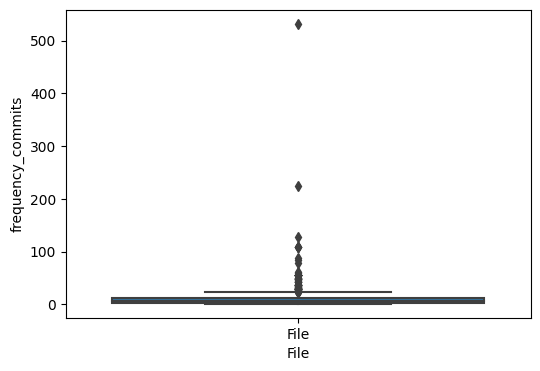

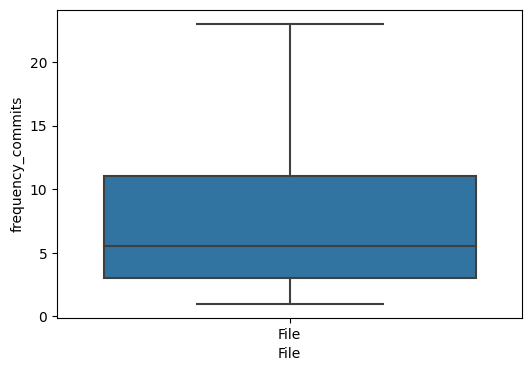

In [27]:
gera_boxplot_frequencia_commits(df_boxplot_fc)

In [28]:
fc_q1,fc_q2, fc_q3, fc_q4 = calcula_quartiles_frequencia_commits(df_boxplot_fc)

Quartis da Frequencia de Commits Q1: [3.], Q2: [5.5], Q3: [11.], Q4: [532.]


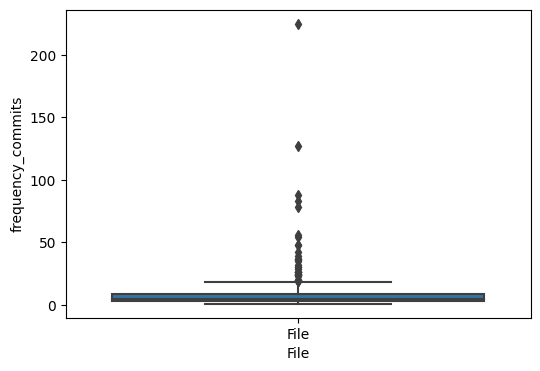

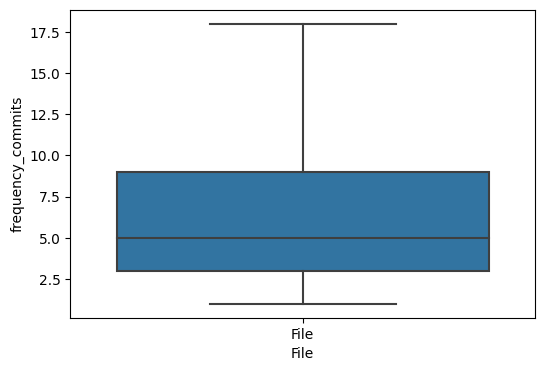

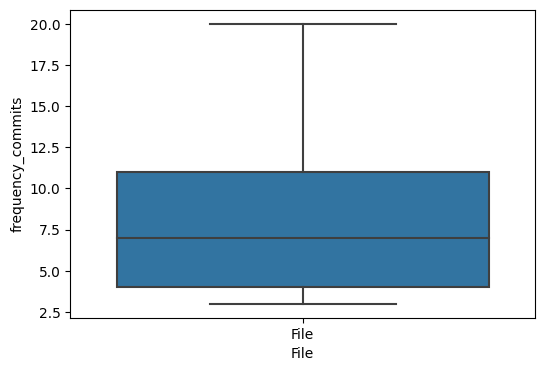

In [29]:
df_fc_java_impl, df_boxplot_fc_java_impl, df_boxplot_fc_java_impl2 = gera_boxplot_frequencia_commits_only_java(df_fc)

In [30]:
fc_q1_java_impl, fc_q2_java_impl, fc_q3_java_impl, fc_q4_java_impl = calcula_quartiles_frequencia_commmits_no_outliers_less_3(df_boxplot_fc_java_impl2)

Quartis da Frequencia de Commits Q1: [4.], Q2: [7.], Q3: [11.], Q4: [225.]


In [32]:
df_em_fc = gera_df_foc_amloc(df_accumulated_modified_locs, df_fc)

In [33]:
df_em_fc

,name,modified_lines,frequency_commits
0,$Cache.java,8,1
1,$Gson$Preconditions.html,1858,10
2,$Gson$Preconditions.java,20,4
3,$Gson$Types.html,2762,10
4,$Gson$Types.java,376,26
...,...,...,...
671,serialized-form.html,3680,28
672,settings.gradle,2,2
673,strings.xml,5,1
674,stylesheet.css,2618,20


In [34]:
df_fator_multiplicacao = gera_df_fator_foc_amloc(df_em_fc)
df_fator_multiplicacao

,name,modified_lines,frequency_commits,factor1
0,$Cache.java,8,1,8
1,$Gson$Preconditions.html,1858,10,18580
2,$Gson$Preconditions.java,20,4,80
3,$Gson$Types.html,2762,10,27620
4,$Gson$Types.java,376,26,9776
...,...,...,...,...
671,serialized-form.html,3680,28,103040
672,settings.gradle,2,2,4
673,strings.xml,5,1,5
674,stylesheet.css,2618,20,52360


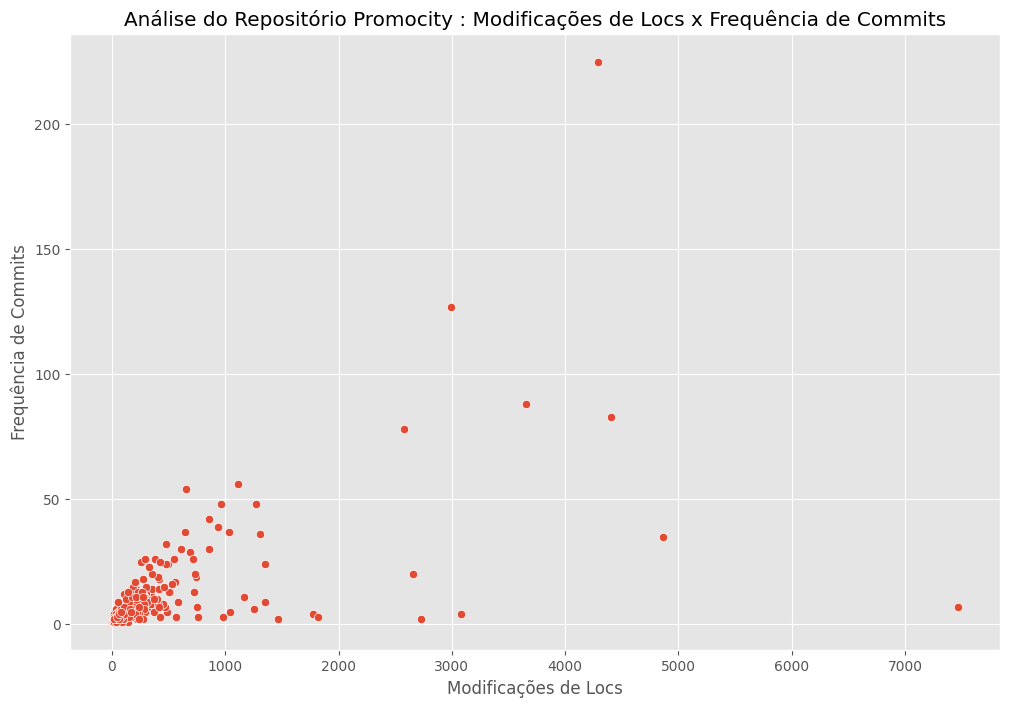

In [39]:
df_em_fc_java_impl, df_fator_multiplicacao_em_fc_java_impl = gera_scatter_plot_foc_amloc(df_em_fc)

In [40]:
em_q3_java_impl, fc_q3_java_impl

(array([282.]), array([11.]))

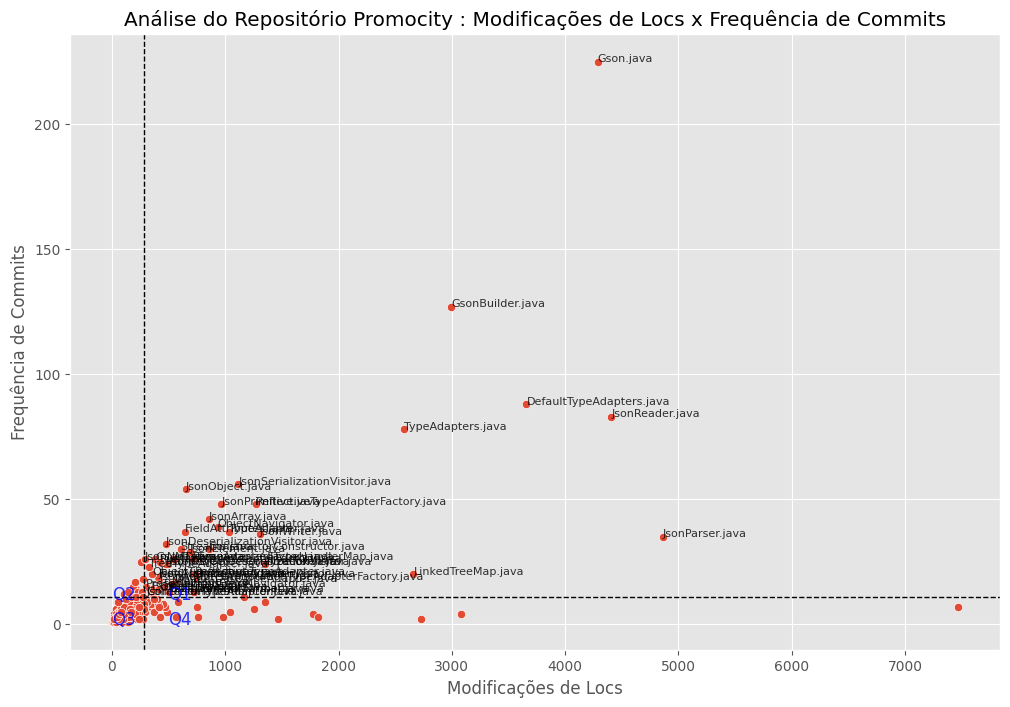

In [41]:
list_initial_critical_files_from_sp = gera_scatter_plot_foc_amloc_com_quadrantes(df_em_fc_java_impl, em_q3_java_impl, fc_q3_java_impl)

In [42]:
len(list_initial_critical_files_from_sp)

46

('$Gson$Types.java', 376, 26)
('CollectionTypeAdapter.java', 302, 12)
('ConstructorConstructor.java', 852, 30)
('DefaultDateTypeAdapter.java', 555, 17)
('DefaultTypeAdapters.java', 3658, 88)
('Escaper.java', 510, 13)
('Excluder.java', 355, 14)
('FieldAttributes.java', 647, 37)
('FieldNamingPolicy.java', 416, 19)
('Gson.java', 4288, 225)
('GsonBuilder.java', 2996, 127)
('JsonAdapterAnnotationTypeAdapterFactory.java', 416, 18)
('JsonArray.java', 853, 42)
('JsonArrayDeserializationVisitor.java', 410, 19)
('JsonDeserializationContext.java', 303, 12)
('JsonDeserializationVisitor.java', 476, 32)
('JsonElement.java', 689, 29)
('JsonNull.java', 289, 26)
('JsonObject.java', 649, 54)
('JsonObjectDeserializationVisitor.java', 498, 24)
('JsonParser.java', 4861, 35)
('JsonPrimitive.java', 964, 48)
('JsonPrintFormatter.java', 726, 13)
('JsonReader.java', 4407, 83)
('JsonSerializationVisitor.java', 1116, 56)
('JsonWriter.java', 1304, 36)
('LazilyParsedNumber.java', 499, 13)
('LinkedTreeMap.java', 266

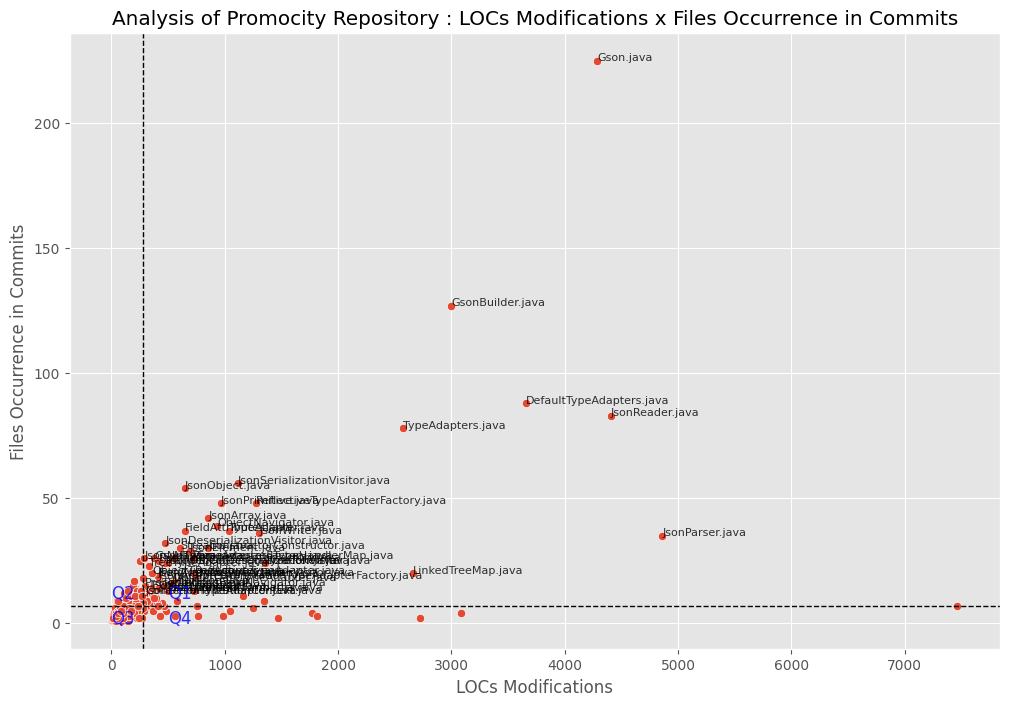

In [44]:
list_critical_files = gera_scatter_plot_final_foc_amloc_com_quadrantes(list_initial_critical_files_from_sp, df_em_fc_java_impl, em_q3_java_impl, fc_q2_java_impl)

# Faz a análise das dependências dos arquivos

In [46]:
import utilidades
import datetime

## Funções

In [72]:
# promocity/src/main/java/ufc/cmu/promocity
def gera_arquivos_java(path_projeto, nome_arquivo='arquivosjava.txt'):
  try:
    # Gera um arquivo contendo todos os arquivos .java do projeto
    query = f'find {path_projeto} -name "*.java" > {nome_arquivo}'
    utilidades.executa_comando(comando=query)
    print(f'Arquivo {nome_arquivo} gerado com sucesso!')
  except Exception as ex:
    print(f'Erro ao gerar o arquivosjava.txt: {str(ex)}')

# Dado 'org.apache.cassandra.index.Index.java'
# Retorne 'pilot/analises/designite/v-3-11-11/src/java/org/apache/cassandra/index/Index.java'

def get_path_file(my_file, src_java_path):
  path_file = None
  my_file = my_file.replace('.java', '') # org.apache.cassandra.index.Index
  my_file = my_file.replace('.', '/') # org/apache/cassandra/index/Index
  my_file = my_file + '.java' # org/apache/cassandra/index/Index.java
  path_file =  src_java_path  + my_file
  return path_file

def teste_find_word_in_file(my_file, my_word):
    with open(my_file) as f:
        datafile = f.readlines()
        found = False  # This isn't really necessary
        for line in datafile:
          if my_word in line:
            # found = True # Not necessary
            return True
    return False  # Because you finished the search without finding

def lista_arquivos_que_dependem_de(my_file, dicionario):
  lista_temp = []
  my_file = my_file.replace('/','.')
  if my_file in dicionario:
    for each in dicionario[my_file]:
      if each[2] == 1:
        lista_temp.append(each)
  return lista_temp

# Cria duas listas contendo o conjunto de arquivos da versão analisada
def cria_duas_listas_arquivos_analisados(nome_arquivo='arquivosjava.txt', diretorio_src_main='promocity/src/main/java/'):
  lista_linhas_arquivos_cassandra = []
  lista_colunas_arquivos_cassandra = []
  with open(nome_arquivo, mode='r+', encoding='utf-8') as file:
    for line in file:
      line = line.rstrip()
      line = line.replace(diretorio_src_main, '')
      line = line.replace('/', '.')
      lista_linhas_arquivos_cassandra.append(line)
      lista_colunas_arquivos_cassandra.append(line)
  return lista_linhas_arquivos_cassandra, lista_colunas_arquivos_cassandra

def cria_dicionario_dsm(lista_linhas_arquivos_cassandra, lista_colunas_arquivos_cassandra, path_main):
  t1 = datetime.datetime.now()
  dicionario_dsm = {}
  lista_aux = []
  for each_file in lista_linhas_arquivos_cassandra:
    for each_elemento_coluna in lista_colunas_arquivos_cassandra:
      my_search = each_elemento_coluna
      my_search = my_search.replace('.java', ';')
      my_path = get_path_file(my_file=each_file, src_java_path=path_main)
      if teste_find_word_in_file(my_file=my_path,my_word=my_search):
        item = (each_file, each_elemento_coluna, 1)
      else:
        item = (each_file, each_elemento_coluna, 0)
      lista_aux.append(item)
    dicionario_dsm[each_file] = lista_aux
    lista_aux = []
  t2 = datetime.datetime.now()
  delta = t2 - t1
  print(f'Tempo para criar o dicionarário dsm: {delta}, itens percorridos: {len(dicionario_dsm)}')
  return dicionario_dsm

In [73]:
# path_arquivo_a='ufc.cmu.promocity.backend.context.UserLocationMonitoring.java'
def get_arquivos_A_usa_B(path_arquivo_a, dicionario_dsm):
  # Exemplo: Relação de Arquivos que UserLocationMonitoring.java depende de
  # sao os arquivos Bs que A precisa para sua implementacao
  lista_arquivos = []
  i = 1
  for tupla in dicionario_dsm[path_arquivo_a]:
    if tupla[2] == 1:
      print(f'{i}, {tupla}')
      i = i + 1
      lista_arquivos.append(tupla[1])
  return lista_arquivos

# Dicionario que dado um arquivo X, monta uma matriz de dependencia de X, ou seja, uma lista de arquivos que dependem de X
def cria_dicionario_dsm_depende_de(lista_linhas_arquivos_cassandra, lista_colunas_arquivos_cassandra, path_main):
  t1 = datetime.datetime.now()
  dicionario_dsm_depende_de = {}
  lista_aux = []

  for each_file in lista_linhas_arquivos_cassandra:
    for each_elemento_coluna in lista_colunas_arquivos_cassandra:
      my_search = each_file
      my_search = my_search.replace('.java', ';')
      my_path = get_path_file(my_file=each_elemento_coluna, src_java_path=path_main)
      if teste_find_word_in_file(my_file=my_path,my_word=my_search):
        item = (each_elemento_coluna, each_file, 1)
      else:
        item = (each_elemento_coluna, each_file, 0)
      lista_aux.append(item)
    dicionario_dsm_depende_de[each_file] = lista_aux
    lista_aux = []

  t2 = datetime.datetime.now()

  delta = t2 - t1

  print(f'Tempo para criar o dicionarário dsm: {delta}, itens percorridos: {len(dicionario_dsm_depende_de)}')
  return dicionario_dsm_depende_de

def get_arquivos_dependem_de_A(path_arquivo_a, dicionario_dsm_depende_de):
  # Exemplo: Relação de Arquivos que dependem de UserController.java
  lista_arquivos = []
  i = 1
  for tupla in lista_arquivos_que_dependem_de(my_file=path_arquivo_a, dicionario=dicionario_dsm_depende_de):
    if tupla[2] == 1:
      print(f'{i}, {tupla}')
      i += 1
      lista_arquivos.append(tupla[0])
  return lista_arquivos

In [74]:
# Dada uma classe e o arquivo texto contendo todos os arquivos do repositorio,
# retorna o pacote da classe junto com classe
# path = 'promocity/src/main/java/'
def get_file_package(my_file, my_content, path):
  with open(my_content, mode='r+', encoding='utf-8') as file:
    for line in file:
      if my_file in line:
        line = line.replace(path, '')
        line = line.replace('/','.')
        line = line.strip()
        return line

# Dada a lista de arquivos criticos [(arquivo1, qtd linhas modificadas, frequencia de commits), (), ...]
# arquivo texto contendo todos os arquivos do repositorio
# dicionario com a DSM file_a uses file_b
# retorna o dicionario com chave file_a e valores lista de arquivos que file_a chama(importa)
## arquivosjava.txt e dicionario_dsm
def get_dict_file_a_uses_file_b(lista_arquivos_criticos, content, my_dictionary, path_main):
  dict_file_a_uses_file_b = {}
  lista_file_a_uses_file_b = []
  for each in lista_arquivos_criticos:
    item = each[0]
    key_file = get_file_package(my_file=item, my_content=content, path=path_main)
    if key_file is not None:
      for each_tupla in my_dictionary[key_file]:
        if each_tupla[2] == 1:
          lista_file_a_uses_file_b.append(each_tupla[1])
      dict_file_a_uses_file_b[key_file] = lista_file_a_uses_file_b
      lista_file_a_uses_file_b = []
  return dict_file_a_uses_file_b

# Todo: revisar, pois está substituindo config.java por GuardrailsConfig.java
# Dada a lista de arquivos criticos [(arquivo1, qtd linhas modificadas, frequencia de commits), (), ...]
# arquivo texto contendo todos os arquivos do repositorio
# dicionario com a DSM file_a depende de file_b
# retorna o dicionario com chave file_a e valores lista de arquivos que dependem de file_a
## content='arquivosjava.txt', my_dictionary=dicionario_dsm_depende_de
def get_dict_file_impact_other_files(lista_arquivos_criticos, content, my_dictionary, path_main):
  dict_file_impact_other_files = {}
  lista_file_a_depends_on_file_b = []

  for each in lista_arquivos_criticos:
    item = each[0]
    key_file = get_file_package(my_file=item, my_content=content, path=path_main)
    if key_file is not None:
      for tupla in lista_arquivos_que_dependem_de(my_file=key_file, dicionario=my_dictionary):
        if tupla[2] == 1:
          lista_file_a_depends_on_file_b.append(tupla[0])
      dict_file_impact_other_files[key_file] = lista_file_a_depends_on_file_b
      lista_file_a_depends_on_file_b = []
  return dict_file_impact_other_files

In [75]:
def mostra_lista_arquivos_dependentes(lista_arquivos_criticos, content, my_dictionary, path_main):
  # Dado um arquivo chave, mostra a lista de arquivos que dependem do arquivo chave
  dict_arquivos_dependentes_arquivos_criticos = get_dict_file_impact_other_files(lista_arquivos_criticos, content, my_dictionary, path_main)

  lista_arquivos_impactados = []
  l_ac = []
  l_adac = []
  l_tamanho_adac = []
  for key, value in dict_arquivos_dependentes_arquivos_criticos.items():
    print(key, value)
    l_ac.append(key)
    l_tamanho_adac.append(len(value))
    l_adac.append(value)

  return dict_arquivos_dependentes_arquivos_criticos, lista_arquivos_impactados, l_ac, l_adac, l_tamanho_adac

def gera_df_arquivos_dependentes_arquivos_criticos(l_ac, l_tamanho_adac, l_adac):
  df_arquivos_dependentes_arquivos_criticos = pd.DataFrame({'arquivos_criticos':l_ac, 'qtd_arquivos_dependentes':l_tamanho_adac, 'arquivos_dependentes':l_adac})
  try:
    df_arquivos_dependentes_arquivos_criticos.to_csv('arquivos_dependentes_arquivos_criticos.csv')
  except Exception as ex:
    print(f'Erro ao salvar o arquivo arquivos_dependentes_arquivos_criticos.csv : {str(ex)}')
  return df_arquivos_dependentes_arquivos_criticos

# lista_arquivos_impactados_unicos
def gera_lista_arquivos_impactados_unicos(dict_arquivos_dependentes_arquivos_criticos, lista_arquivos_impactados):
  for key, value in dict_arquivos_dependentes_arquivos_criticos.items():
    print(f"Mudanças na classe {key} podem impactar {len(value)} classes")

  for key, value in dict_arquivos_dependentes_arquivos_criticos.items():
    lista_arquivos_impactados = lista_arquivos_impactados + value

  set_lista_arquivos_impactados = set(lista_arquivos_impactados)
  lista_arquivos_impactados_unicos = list(set_lista_arquivos_impactados)
  return lista_arquivos_impactados_unicos

In [76]:
def relatorio_linhas_alteradas_pelas_classes_criticas(lista_arquivos_impactados_unicos,lista_arquivos_criticos, df_em_fc_java_impl, df_files_commits_from_db):
  # Quantidade de arquivos impactados pelas classes críticas
  print(f"Existem {len(lista_arquivos_impactados_unicos)} classes que podem ser impactados pelas {len(lista_arquivos_criticos)} classes críticas.")

  print(f'Classes críticas: {len(lista_arquivos_criticos)}')
  print(f'Classes impactadas: {len(lista_arquivos_impactados_unicos)}')
  print(f'Total de classes .java do sistema: {df_em_fc_java_impl.shape[0]}')

  print(f'Existem {len(lista_arquivos_criticos)} arquivos: {[item[0] for item in lista_arquivos_criticos]} que podem impactar {len(lista_arquivos_impactados_unicos)} dos {df_em_fc_java_impl.shape[0]} arquivos .java')
  print(f'{len(lista_arquivos_impactados_unicos)} Potenciais arquivos impactados: {lista_arquivos_impactados_unicos}')

  # df.groupby(['A','C'])['B'].sum()
  df_lm = df_files_commits_from_db.copy()
  qtd_lm = df_lm[['file_is_java','file_filename', 'modified_lines']][df_lm.file_is_java==1].groupby('file_filename')['modified_lines'].sum()
  df_qtd_lm = qtd_lm.to_frame()
  #df_qtd_lm['file_filename'] = df_qtd_lm.index
  df_qtd_lm = df_qtd_lm.reset_index()
  #df_qtd_lm

  # Quantidade de linhas modificadas dos arquivos criticos
  dict_modified_lines_arquivos_criticos = {}

  for each in lista_arquivos_criticos:
    qtd_temp = df_qtd_lm[df_qtd_lm.file_filename == each[0]]['modified_lines'].to_list()
    if len(qtd_temp) == 1:
      dict_modified_lines_arquivos_criticos[each[0]] = qtd_temp[0]

  #dict_modified_lines_arquivos_criticos

  soma_modified_lines_arquivos_criticos = 0
  for key, value in dict_modified_lines_arquivos_criticos.items():
    soma_modified_lines_arquivos_criticos = soma_modified_lines_arquivos_criticos + value

  print(f'As {len(dict_modified_lines_arquivos_criticos)} classes criticas mudaram {soma_modified_lines_arquivos_criticos} linhas no sistema')

  lista_nomes_arquivos_impactados_unicos = []

  for each in lista_arquivos_impactados_unicos:
    each = each.split('.')
    temp = each[-2] + '.' + each[-1]
    lista_nomes_arquivos_impactados_unicos.append(temp)
  return lista_nomes_arquivos_impactados_unicos, df_qtd_lm, dict_modified_lines_arquivos_criticos, soma_modified_lines_arquivos_criticos

In [77]:
# Dada uma classe critica e um dataframe contendo todos os commits analisados
# retorna a lista de arquivos que sao modificados junto com o arquivo critico
def get_lista_arquivos_modificados_with_critico(filename, df):
  lista_temp_arquivos = []
  lista_temp = []

  lista_arquivos_modificados_com_filename = df[df['modified_files'].str.contains(filename)]['modified_files'].to_list()

  for each in lista_arquivos_modificados_com_filename:
    lista_temp = each.split(',')
    lista_temp_arquivos = lista_temp_arquivos + lista_temp
    lista_temp = []

  set_lista_temp_arquivos = set(lista_temp_arquivos)
  lista_temp_arquivos_unicos = list(set_lista_temp_arquivos)
  return lista_temp_arquivos_unicos

# Data a lista de arquivos criticos e todos os commits da faixa analisada
# retorna um dicionario com chave no arquivo critico e a lista dos arquivos que sao modificados em conjunto com ele.
def get_dict_arquivos_modificados_with_critico(lista, df):
  dict_arquivos_modificados_with_critico = {}
  lista_temp = []
  for filename in lista:
    lista_temp = get_lista_arquivos_modificados_with_critico(filename[0], df)
    dict_arquivos_modificados_with_critico[filename[0]] = lista_temp
    lista_temp = []
  return dict_arquivos_modificados_with_critico

# Dado um arquivo critico,
# retorna a lista de arquivos impactados por ele
def get_arquivos_impactados_por_file(lista, filename, path_main):
  lista_arquivos_criticos = lista
  lista_temp = []
  for key, value in get_dict_file_impact_other_files(lista_arquivos_criticos, content='arquivosjava.txt', my_dictionary=dicionario_dsm_depende_de, path_main=path_main).items():
    if filename in key:
      lista_temp = []
      for file in value:
        temp = file.split('.')[-2]
        temp = temp + '' + '.java'
        lista_temp.append(temp)
  return lista_temp

# dicionário de arquivos criticos e seus arquivos que dependem dele e também sao co-change
def get_dict_arquivos_dependem_e_cochange_critico(lista, path_main):
  lista_arquivos_criticos = lista
  dict_arquivos_dependem_e_cochange_critico = {}

  for filename in lista_arquivos_criticos:
    lista_temp_dependem_filename = get_arquivos_impactados_por_file(lista_arquivos_criticos, filename[0], path_main)
    lista_temp_cochange_filename = dict_arquivo_critico_cochange[filename[0]]

    lista_arquivos_dependem_de_and_cochange_filename = []
    for each in lista_temp_dependem_filename:
      if each in lista_temp_cochange_filename:
        lista_arquivos_dependem_de_and_cochange_filename.append(each)

    dict_arquivos_dependem_e_cochange_critico[filename[0]] = lista_arquivos_dependem_de_and_cochange_filename

  return dict_arquivos_dependem_e_cochange_critico

## Teste de Dependência entre os arquivos

Arquivo A depende de B

In [53]:
!ls -lia gson/gson/src/main/java

total 16
1704143 drwxr-xr-x 3 root root 4096 Jul 15 18:54 .
1704136 drwxr-xr-x 5 root root 4096 Jul 15 18:54 ..
1704144 drwxr-xr-x 3 root root 4096 Jul 15 18:54 com
1704236 -rw-r--r-- 1 root root 1106 Jul 15 18:54 module-info.java


In [63]:
path_projeto_src_java = "gson/gson/src/main/java/"

In [54]:
!cd gson && git ls-files | grep -c '\.java$'

243


In [55]:
!cd gson/gson/src/main/java && find . -name "*.java" | grep -c ""

82


In [64]:
gera_arquivos_java(path_projeto=path_projeto_src_java, nome_arquivo='arquivosjava.txt')

Arquivo arquivosjava.txt gerado com sucesso!


In [65]:
lista_linhas_arquivos_cassandra, lista_colunas_arquivos_cassandra = cria_duas_listas_arquivos_analisados(nome_arquivo='arquivosjava.txt', diretorio_src_main=path_projeto_src_java)

In [67]:
dicionario_dsm = cria_dicionario_dsm(lista_linhas_arquivos_cassandra, lista_colunas_arquivos_cassandra, path_main=path_projeto_src_java)

Tempo para criar o dicionarário dsm: 0:00:00.224282, itens percorridos: 82


In [ ]:
dicionario_dsm

In [69]:
for k,v in dicionario_dsm.items():
  print(k)

module-info.java
com.google.gson.ReflectionAccessFilter.java
com.google.gson.FormattingStyle.java
com.google.gson.stream.JsonToken.java
com.google.gson.stream.JsonWriter.java
com.google.gson.stream.JsonScope.java
com.google.gson.stream.package-info.java
com.google.gson.stream.MalformedJsonException.java
com.google.gson.stream.JsonReader.java
com.google.gson.InstanceCreator.java
com.google.gson.TypeAdapterFactory.java
com.google.gson.JsonParser.java
com.google.gson.ToNumberPolicy.java
com.google.gson.JsonDeserializer.java
com.google.gson.FieldNamingPolicy.java
com.google.gson.JsonParseException.java
com.google.gson.JsonStreamParser.java
com.google.gson.LongSerializationPolicy.java
com.google.gson.ToNumberStrategy.java
com.google.gson.TypeAdapter.java
com.google.gson.internal.$Gson$Types.java
com.google.gson.internal.$Gson$Preconditions.java
com.google.gson.internal.ReflectionAccessFilterHelper.java
com.google.gson.internal.Primitives.java
com.google.gson.internal.bind.CollectionTypeAdap

In [78]:
lista_a_usa_b = get_arquivos_A_usa_B('com.google.gson.JsonArray.java', dicionario_dsm)

1, ('com.google.gson.JsonArray.java', 'com.google.gson.internal.NonNullElementWrapperList.java', 1)


In [79]:
dicionario_dsm_depende_de = cria_dicionario_dsm_depende_de(lista_linhas_arquivos_cassandra, lista_colunas_arquivos_cassandra, path_main=path_projeto_src_java)

Tempo para criar o dicionarário dsm: 0:00:00.672902, itens percorridos: 82


In [80]:
for k, v in dicionario_dsm_depende_de.items():
  print(k)

module-info.java
com.google.gson.ReflectionAccessFilter.java
com.google.gson.FormattingStyle.java
com.google.gson.stream.JsonToken.java
com.google.gson.stream.JsonWriter.java
com.google.gson.stream.JsonScope.java
com.google.gson.stream.package-info.java
com.google.gson.stream.MalformedJsonException.java
com.google.gson.stream.JsonReader.java
com.google.gson.InstanceCreator.java
com.google.gson.TypeAdapterFactory.java
com.google.gson.JsonParser.java
com.google.gson.ToNumberPolicy.java
com.google.gson.JsonDeserializer.java
com.google.gson.FieldNamingPolicy.java
com.google.gson.JsonParseException.java
com.google.gson.JsonStreamParser.java
com.google.gson.LongSerializationPolicy.java
com.google.gson.ToNumberStrategy.java
com.google.gson.TypeAdapter.java
com.google.gson.internal.$Gson$Types.java
com.google.gson.internal.$Gson$Preconditions.java
com.google.gson.internal.ReflectionAccessFilterHelper.java
com.google.gson.internal.Primitives.java
com.google.gson.internal.bind.CollectionTypeAdap

In [81]:
lista_x_depende_y = get_arquivos_dependem_de_A('com.google.gson.JsonArray.java', dicionario_dsm_depende_de)

1, ('com.google.gson.internal.bind.JsonTreeWriter.java', 'com.google.gson.JsonArray.java', 1)
2, ('com.google.gson.internal.bind.TypeAdapters.java', 'com.google.gson.JsonArray.java', 1)
3, ('com.google.gson.internal.bind.JsonTreeReader.java', 'com.google.gson.JsonArray.java', 1)


In [82]:
lista_arquivos_criticos = list_critical_files
print(len(lista_arquivos_criticos))
print(lista_arquivos_criticos)

46
[('$Gson$Types.java', 376, 26), ('CollectionTypeAdapter.java', 302, 12), ('ConstructorConstructor.java', 852, 30), ('DefaultDateTypeAdapter.java', 555, 17), ('DefaultTypeAdapters.java', 3658, 88), ('Escaper.java', 510, 13), ('Excluder.java', 355, 14), ('FieldAttributes.java', 647, 37), ('FieldNamingPolicy.java', 416, 19), ('Gson.java', 4288, 225), ('GsonBuilder.java', 2996, 127), ('JsonAdapterAnnotationTypeAdapterFactory.java', 416, 18), ('JsonArray.java', 853, 42), ('JsonArrayDeserializationVisitor.java', 410, 19), ('JsonDeserializationContext.java', 303, 12), ('JsonDeserializationVisitor.java', 476, 32), ('JsonElement.java', 689, 29), ('JsonNull.java', 289, 26), ('JsonObject.java', 649, 54), ('JsonObjectDeserializationVisitor.java', 498, 24), ('JsonParser.java', 4861, 35), ('JsonPrimitive.java', 964, 48), ('JsonPrintFormatter.java', 726, 13), ('JsonReader.java', 4407, 83), ('JsonSerializationVisitor.java', 1116, 56), ('JsonWriter.java', 1304, 36), ('LazilyParsedNumber.java', 499, 

In [83]:
# arquivosjava.txt e dicionario_dsm
get_dict_file_a_uses_file_b(lista_arquivos_criticos, content='arquivosjava.txt', my_dictionary=dicionario_dsm, path_main=path_projeto_src_java)

{'com.google.gson.internal.$Gson$Types.java': [],
 'com.google.gson.internal.ConstructorConstructor.java': ['com.google.gson.ReflectionAccessFilter.java',
  'com.google.gson.InstanceCreator.java',
  'com.google.gson.internal.reflect.ReflectionHelper.java',
  'com.google.gson.JsonIOException.java',
  'com.google.gson.reflect.TypeToken.java'],
 'com.google.gson.internal.bind.DefaultDateTypeAdapter.java': ['com.google.gson.stream.JsonToken.java',
  'com.google.gson.stream.JsonWriter.java',
  'com.google.gson.stream.JsonReader.java',
  'com.google.gson.TypeAdapterFactory.java',
  'com.google.gson.TypeAdapter.java',
  'com.google.gson.internal.bind.util.ISO8601Utils.java',
  'com.google.gson.internal.PreJava9DateFormatProvider.java',
  'com.google.gson.internal.JavaVersion.java',
  'com.google.gson.JsonSyntaxException.java'],
 'com.google.gson.internal.Excluder.java': ['com.google.gson.stream.JsonWriter.java',
  'com.google.gson.stream.JsonReader.java',
  'com.google.gson.TypeAdapterFactory

In [84]:
get_dict_file_a_uses_file_b(lista_arquivos_criticos, content='arquivosjava.txt', my_dictionary=dicionario_dsm_depende_de, path_main=path_projeto_src_java)

{'com.google.gson.internal.$Gson$Types.java': ['com.google.gson.internal.$Gson$Types.java',
  'com.google.gson.internal.$Gson$Types.java',
  'com.google.gson.internal.$Gson$Types.java',
  'com.google.gson.internal.$Gson$Types.java',
  'com.google.gson.internal.$Gson$Types.java'],
 'com.google.gson.internal.ConstructorConstructor.java': ['com.google.gson.internal.ConstructorConstructor.java',
  'com.google.gson.internal.ConstructorConstructor.java',
  'com.google.gson.internal.ConstructorConstructor.java',
  'com.google.gson.internal.ConstructorConstructor.java',
  'com.google.gson.internal.ConstructorConstructor.java'],
 'com.google.gson.internal.bind.DefaultDateTypeAdapter.java': ['com.google.gson.internal.bind.DefaultDateTypeAdapter.java'],
 'com.google.gson.internal.Excluder.java': ['com.google.gson.internal.Excluder.java',
  'com.google.gson.internal.Excluder.java',
  'com.google.gson.internal.Excluder.java'],
 'com.google.gson.FieldAttributes.java': ['com.google.gson.FieldAttribut

In [85]:
dict_arquivos_dependentes_arquivos_criticos, lista_arquivos_impactados, l_ac, l_adac, l_tamanho_adac = mostra_lista_arquivos_dependentes(lista_arquivos_criticos, content='arquivosjava.txt', my_dictionary=dicionario_dsm_depende_de, path_main=path_projeto_src_java)

com.google.gson.internal.$Gson$Types.java ['com.google.gson.internal.bind.CollectionTypeAdapterFactory.java', 'com.google.gson.internal.bind.ArrayTypeAdapter.java', 'com.google.gson.internal.bind.ReflectiveTypeAdapterFactory.java', 'com.google.gson.internal.bind.MapTypeAdapterFactory.java', 'com.google.gson.reflect.TypeToken.java']
com.google.gson.internal.ConstructorConstructor.java ['com.google.gson.internal.bind.CollectionTypeAdapterFactory.java', 'com.google.gson.internal.bind.ReflectiveTypeAdapterFactory.java', 'com.google.gson.internal.bind.JsonAdapterAnnotationTypeAdapterFactory.java', 'com.google.gson.internal.bind.MapTypeAdapterFactory.java', 'com.google.gson.Gson.java']
com.google.gson.internal.bind.DefaultDateTypeAdapter.java ['com.google.gson.GsonBuilder.java']
com.google.gson.internal.Excluder.java ['com.google.gson.internal.bind.ReflectiveTypeAdapterFactory.java', 'com.google.gson.Gson.java', 'com.google.gson.GsonBuilder.java']
com.google.gson.FieldAttributes.java ['com.g

In [86]:
df_arquivos_dependentes_arquivos_criticos = gera_df_arquivos_dependentes_arquivos_criticos(l_ac, l_tamanho_adac, l_adac)

In [87]:
df_arquivos_dependentes_arquivos_criticos

,arquivos_criticos,qtd_arquivos_dependentes,arquivos_dependentes
0,com.google.gson.internal.$Gson$Types.java,5,[com.google.gson.internal.bind.CollectionTypeA...
1,com.google.gson.internal.ConstructorConstructo...,5,[com.google.gson.internal.bind.CollectionTypeA...
2,com.google.gson.internal.bind.DefaultDateTypeA...,1,[com.google.gson.GsonBuilder.java]
3,com.google.gson.internal.Excluder.java,3,[com.google.gson.internal.bind.ReflectiveTypeA...
4,com.google.gson.FieldAttributes.java,1,[com.google.gson.internal.Excluder.java]
5,com.google.gson.FieldNamingPolicy.java,0,[]
6,com.google.gson.Gson.java,16,[com.google.gson.internal.bind.CollectionTypeA...
7,com.google.gson.GsonBuilder.java,2,"[com.google.gson.annotations.Since.java, com.g..."
8,com.google.gson.internal.bind.JsonAdapterAnnot...,1,[com.google.gson.Gson.java]
9,com.google.gson.JsonArray.java,3,[com.google.gson.internal.bind.JsonTreeWriter....


In [88]:
lista_arquivos_impactados_unicos = gera_lista_arquivos_impactados_unicos(dict_arquivos_dependentes_arquivos_criticos, lista_arquivos_impactados)
print(f'Arquivos impactados unicos: {lista_arquivos_impactados_unicos}')

Mudanças na classe com.google.gson.internal.$Gson$Types.java podem impactar 5 classes
Mudanças na classe com.google.gson.internal.ConstructorConstructor.java podem impactar 5 classes
Mudanças na classe com.google.gson.internal.bind.DefaultDateTypeAdapter.java podem impactar 1 classes
Mudanças na classe com.google.gson.internal.Excluder.java podem impactar 3 classes
Mudanças na classe com.google.gson.FieldAttributes.java podem impactar 1 classes
Mudanças na classe com.google.gson.FieldNamingPolicy.java podem impactar 0 classes
Mudanças na classe com.google.gson.Gson.java podem impactar 16 classes
Mudanças na classe com.google.gson.GsonBuilder.java podem impactar 2 classes
Mudanças na classe com.google.gson.internal.bind.JsonAdapterAnnotationTypeAdapterFactory.java podem impactar 1 classes
Mudanças na classe com.google.gson.JsonArray.java podem impactar 3 classes
Mudanças na classe com.google.gson.JsonDeserializationContext.java podem impactar 1 classes
Mudanças na classe com.google.gson

In [89]:
lista_nomes_arquivos_impactados_unicos, df_qtd_lm, dict_modified_lines_arquivos_criticos, soma_modified_lines_arquivos_criticos = relatorio_linhas_alteradas_pelas_classes_criticas(lista_arquivos_impactados_unicos,lista_arquivos_criticos, df_em_fc_java_impl, df_files_commits_from_db)

Existem 38 classes que podem ser impactados pelas 46 classes críticas.
Classes críticas: 46
Classes impactadas: 38
Total de classes .java do sistema: 339
Existem 46 arquivos: ['$Gson$Types.java', 'CollectionTypeAdapter.java', 'ConstructorConstructor.java', 'DefaultDateTypeAdapter.java', 'DefaultTypeAdapters.java', 'Escaper.java', 'Excluder.java', 'FieldAttributes.java', 'FieldNamingPolicy.java', 'Gson.java', 'GsonBuilder.java', 'JsonAdapterAnnotationTypeAdapterFactory.java', 'JsonArray.java', 'JsonArrayDeserializationVisitor.java', 'JsonDeserializationContext.java', 'JsonDeserializationVisitor.java', 'JsonElement.java', 'JsonNull.java', 'JsonObject.java', 'JsonObjectDeserializationVisitor.java', 'JsonParser.java', 'JsonPrimitive.java', 'JsonPrintFormatter.java', 'JsonReader.java', 'JsonSerializationVisitor.java', 'JsonWriter.java', 'LazilyParsedNumber.java', 'LinkedTreeMap.java', 'MapTypeAdapterFactory.java', 'MappedObjectConstructor.java', 'MiniGson.java', 'ObjectNavigator.java', 'Obj

## Testes de impacto de mudancas

In [90]:
# Quantidade de linhas modificadas dos arquivos impactados
dict_modified_lines_arquivos_impactados = {}

for each in lista_nomes_arquivos_impactados_unicos:
  qtd_temp = df_qtd_lm[df_qtd_lm.file_filename == each]['modified_lines'].to_list()
  if len(qtd_temp) == 1:
    dict_modified_lines_arquivos_impactados[each] = qtd_temp[0]
  else:
    dict_modified_lines_arquivos_impactados[each] = 0

soma_modified_lines_arquivos_impactados = 0
for key, value in dict_modified_lines_arquivos_impactados.items():
  soma_modified_lines_arquivos_impactados = soma_modified_lines_arquivos_impactados + value

print(f'As {len(dict_modified_lines_arquivos_impactados)} classes impactadas, pelos arquivos críticos, mudaram {soma_modified_lines_arquivos_impactados} linhas no sistema')

As 38 classes impactadas, pelos arquivos críticos, mudaram 27311 linhas no sistema


In [91]:
## Soma de todas as linhas modificadas pelos arquivos .java
qtd_arquivos_java = df_qtd_lm.shape[0]
qtd_modified_lines_arquivos_java = df_qtd_lm['modified_lines'].sum()

print(f'{qtd_arquivos_java} arquivos mudaram {qtd_modified_lines_arquivos_java} LOC no sistema')

# As classes críticas e as classes impactada correspondem a X linhas modificadas
# o que dá P % de linhas modificadas no sistema

soma_modified_lines_analisadas = soma_modified_lines_arquivos_criticos + soma_modified_lines_arquivos_impactados

percentual_modified_lines_analisadas = round( (soma_modified_lines_analisadas/qtd_modified_lines_arquivos_java) * 100 , 2)

print(f'As {len(dict_modified_lines_arquivos_criticos)} classes criticas e as {len(dict_modified_lines_arquivos_impactados)} classes impactadas correspondem a {percentual_modified_lines_analisadas}% das linhas modificadas no sistema')


525 arquivos mudaram 172773 LOC no sistema
As 46 classes criticas e as 38 classes impactadas correspondem a 44.68% das linhas modificadas no sistema


In [92]:
# Dataframe contendo todos os commits da faixa analisada
df = df_commits_from_db[['name', 'modified_files']]

# Lista arquivos críticos
print(f'{len(lista_arquivos_criticos)}, {lista_arquivos_criticos}')

# Arquivos impactados únicos
print(f' {len(lista_arquivos_impactados_unicos)}, {lista_arquivos_impactados_unicos}')

# Dicionário com o arquivo crítico e todos os seus arquivos co-change (além dos arquivos de implementação existem os arquivos .txt, de configuração, testes, entre outros)
dict_arquivo_critico_cochange = get_dict_arquivos_modificados_with_critico(lista_arquivos_criticos, df)
print(f'{len(dict_arquivo_critico_cochange)}')

46, [('$Gson$Types.java', 376, 26), ('CollectionTypeAdapter.java', 302, 12), ('ConstructorConstructor.java', 852, 30), ('DefaultDateTypeAdapter.java', 555, 17), ('DefaultTypeAdapters.java', 3658, 88), ('Escaper.java', 510, 13), ('Excluder.java', 355, 14), ('FieldAttributes.java', 647, 37), ('FieldNamingPolicy.java', 416, 19), ('Gson.java', 4288, 225), ('GsonBuilder.java', 2996, 127), ('JsonAdapterAnnotationTypeAdapterFactory.java', 416, 18), ('JsonArray.java', 853, 42), ('JsonArrayDeserializationVisitor.java', 410, 19), ('JsonDeserializationContext.java', 303, 12), ('JsonDeserializationVisitor.java', 476, 32), ('JsonElement.java', 689, 29), ('JsonNull.java', 289, 26), ('JsonObject.java', 649, 54), ('JsonObjectDeserializationVisitor.java', 498, 24), ('JsonParser.java', 4861, 35), ('JsonPrimitive.java', 964, 48), ('JsonPrintFormatter.java', 726, 13), ('JsonReader.java', 4407, 83), ('JsonSerializationVisitor.java', 1116, 56), ('JsonWriter.java', 1304, 36), ('LazilyParsedNumber.java', 499,

In [94]:
#1) Arquivos que dependem de "BulkImport.java":
lista_dependem_storageservice = get_arquivos_impactados_por_file(lista_arquivos_criticos,"TypeAdapter.java", path_projeto_src_java)
print(f'Arquivos que dependem de "TypeAdapter.java": {len(lista_dependem_storageservice)}')

#2) Arquivos que foram commitados pelo menos uma vez com "BulkImport.java"
filename = "TypeAdapter.java"
lista_cochange_storageservice = dict_arquivo_critico_cochange[filename]
print(f'Arquivos que foram commitados pelo menos uma vez com "TypeAdapter.java": {len(lista_cochange_storageservice)}')

#3) Lista arquivos depedentes e cochange com critico
lista_arquivos_dependem_de_and_cochange_storageservice = []
for each in lista_dependem_storageservice:
  if each in lista_cochange_storageservice:
    lista_arquivos_dependem_de_and_cochange_storageservice.append(each)
print(f'QTD de arquivos_dependem_de_and_cochange_TypeAdapter: {len(lista_arquivos_dependem_de_and_cochange_storageservice)}')
print('')
print(f'Arquivos que dependem de TypeAdapter e são co-change: {lista_arquivos_dependem_de_and_cochange_storageservice}')

Arquivos que dependem de "TypeAdapter.java": 18
Arquivos que foram commitados pelo menos uma vez com "TypeAdapter.java": 444
QTD de arquivos_dependem_de_and_cochange_TypeAdapter: 17

Arquivos que dependem de TypeAdapter e são co-change: ['CollectionTypeAdapterFactory.java', 'ArrayTypeAdapter.java', 'DateTypeAdapter.java', 'NumberTypeAdapter.java', 'ReflectiveTypeAdapterFactory.java', 'TypeAdapterRuntimeTypeWrapper.java', 'SerializationDelegatingTypeAdapter.java', 'DefaultDateTypeAdapter.java', 'JsonAdapterAnnotationTypeAdapterFactory.java', 'ObjectTypeAdapter.java', 'TreeTypeAdapter.java', 'TypeAdapters.java', 'MapTypeAdapterFactory.java', 'Excluder.java', 'SqlDateTypeAdapter.java', 'SqlTimestampTypeAdapter.java', 'SqlTimeTypeAdapter.java']
